**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

# Preparando os dados

## Tarefa #1: Recebendo os dados

Para receber os dados podemos fazer o upload do mesmo no Google Drive:

In [ ]:
data_google_id = '17rC5lOWj89_K5_ALNgMzaA_wfck3Up6X'
gdd(file_id=data_google_id,
    dest_path = './data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite = True)

# Armazenandos os dados em um DataFrame
dados = pd.read_csv("data.csv", sep = ',')

0.0 B Done.


Temos 6 colunas distintas nesse dataset:

*   sex: sexo da pessoa *(0: masculino; 1: feminino);*
*   bmi: Indice de massa corporal *(valor contínuo)*
*   children: Número de filhos *(valor discreto)*
*   smoker: Fumante *(0: não fuma; 1: fumante)*
*   region: Diferentes regiões onde a pessoa mora (categorizado em 0; 1; 2; 3)
*   charges: Valor do seguro de vida *(valor contínuo)*

## Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados.head()

In [ ]:
dados.info()

Desse conjunto de dados podemos ver que o mesmo possui váriaveis do tipo int e float. Logo não há a necessidade do uso de *One Hot Encoding* ou *Label Encoding*


In [ ]:
dados.shape

(348, 7)

O valor acima nos informa o tamanho dos nossos dados. Ele possui 348 linhas por 6 colunas. Assim temos 348 exemplos de dados relacionados aos atributos sex, bmi, children, smoker, region e charges.

Vamos checar se o nosso conjunto de dados possui algum valor nulo:

In [ ]:
dados.isnull().sum()

Podemos ver acima que nenhum dos valores obtidos eram nulos!

In [ ]:
dados.describe().T[['min', 'max']]

Podemos ver acima dados como a média (mean), desvio padrão (std), valor mínimo (min), valor máximo (max) e os percentuais de 25, 50 e 75% dos dados.

O percentual nos indica a quantidade de exemplos que estão até um dado valor. Por exemplo 25% das pessoas estão com o bmi em 26,78 ou menos.

Dessa forma, podemos ter uma ideia da distribuição de cada um dos atributos.

Além disso, quando comparamos as colunas de *sex*, *children*, *smoker* e *region* com as colunas de *age* e *bmi* notamos uma diferença significativa na ordem de grandeza dessas colunas. Assim, temos que tratar esse problema com a normalização ou padronização dos dados antes do treinamento do mesmo.

Vamos analisar o histograma dos atributos para checar se iremos normalizar ou padronizar os dados.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

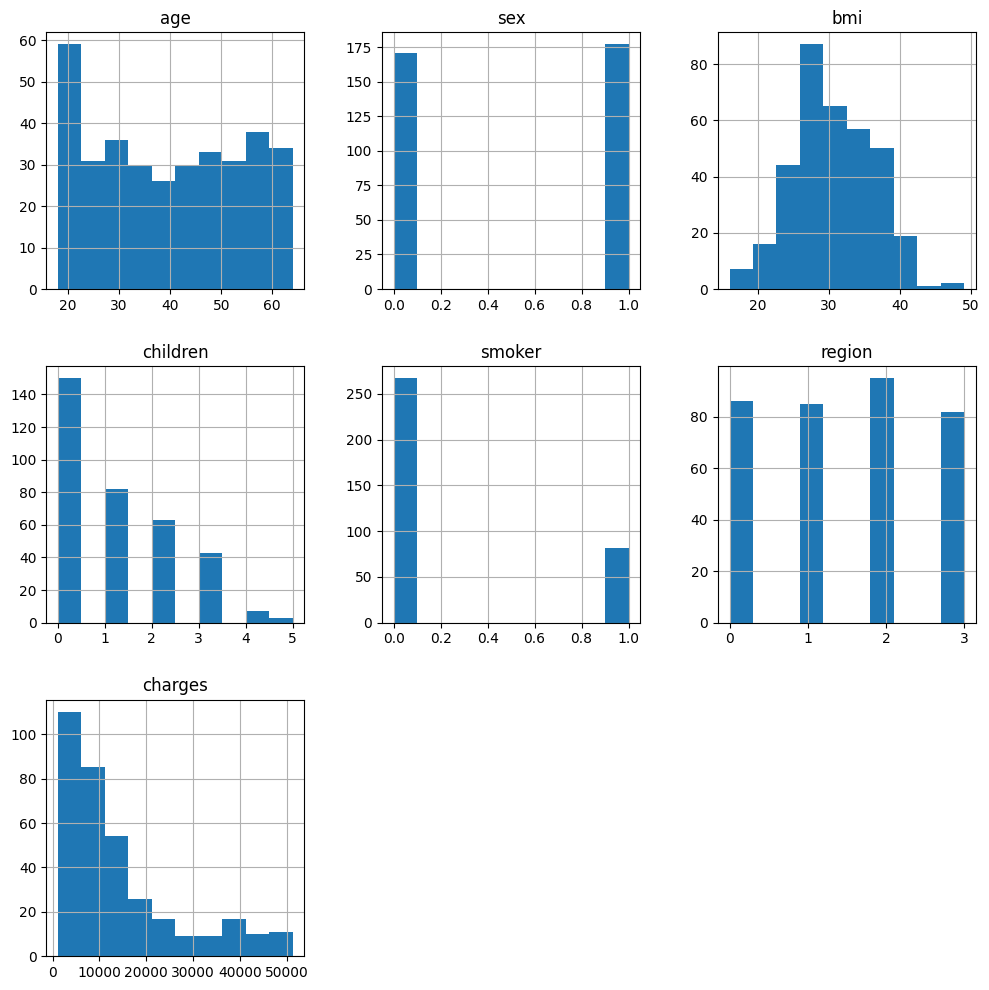

In [ ]:
dados.hist(figsize=(12,12))

Como a coluna *age* não segue uma distribuição normal, iremos normalizar e não padronizar nossos dados!

# Aplicando IA aos nossos dados

No aprendizado supervisionado temos os dados de entrada do nosso modelo $\mathbf{x}_{i}$ e também conhecemos os labels deles $\mathbf{y}_{i}$, isto é o valor esperado da saída do modelo para cada entrada

Nos dados acima o índice $i$ é utilizado para diferenciar cada uma das diferentes pessoas das quais foram levantados os dados acima. **Quais deles poderiam ser nossas entradas e nossas saídas?**

**A resposta para isso depende para cada caso!** Para uma empresa que vende seguros, o ideal é ter um modelo que dado os seguintes atributos: **[sex, bmi, children, smoker, region]** eles possam calcular o valor que será cobrado do seguro para essa pessoa **[charges]**

A imagem a seguir ilustra esse exemplo de divisão de entradas e saídas.


<center>
<img src="https://drive.google.com/uc?export=view&id=1Yvziu9GlD5W-j-Zr1EJ3LAgY_yxbViYU" width="500">

Assim podemos criar um modelo que será treinado para fazer predições do valor de saída ($\hat{\mathbf{y}}_{i}$). O esquema para esse tipo de aprendizado supervisionado pode ser vizualizado a seguir:

<center>
<img src="https://drive.google.com/uc?export=view&id=1hFdoJXTk2jTR3zupjjqlr0dOKuaeOZCE" width="500">


A ideia acima parece muito interessante para criação de diversos modelos e pode ser utilizada em diferentes aplicações.

Entretanto, seria interessante ter uma ideia do quão bom é o nosso modelo, isto é, será que o modelo que criamos tem uma boa capacidade para estimar a sua saída ($\hat{\mathbf{y}}_{i}$) para novos dados?

O que estamos perguntando acima é a verificação da capacidade de generalização do nosso modelo, isto é, a capacidade do modelo de conseguir boas estimativas de saídas para novos dados.

## Divisão dos conjuntos de dados

Pensando na pergunta acima, existem duas possibilidades de soluções:



*   Poderíamos treinar um modelo com todos os nossos dados e vender o resultado disso para um empresa. A empresa posteriormente diria se o modelo está tendo um bom desempenho ou não. **Cenário ruim: Caso o modelo não esteja com um bom desempenho iriamos prejudicar o nome da empresa**
*   Poderíamos dividir os nossos dados em conjunto de treinamento e conjunto de teste. Dessa forma, treinariamos o modelo com o primeiro conjunto e poderíamos utilizar alguma métrica para avaliar o nosso modelo no segundo conjunto de dados. **Assim, teremos uma ideia do desempenho do nosso modelo antes de enviar ao cliente!**



Na imagem a seguir podemos ver o procedimento para trabalhar com o aprendizado supervisionado com a divisão dos dados em conjunto de treinamento ($\mathbf{X}_{train}$ e $\mathbf{y}_{train}$) e no conjunto de teste ($\mathbf{X}_{test}$ e $\mathbf{y}_{test}$)

<center>
<img src="https://drive.google.com/uc?export=view&id=1k3nIve0eo-zOjA48YouMHoKJOFfiabS6" width="600">




Dessa forma os nossos dados que possuem a dimensão de 348 exemplos com 6 colunas devem ser divididos em dois conjuntos para podermos trabalhar com o seu aprendizado supervisionado

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Dividindo os dados em Entrada (X) e Saída (y)
X = dados.drop(columns=['charges'])
y = dados['charges']

# Dividindo os dados em conjunto de treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Aplicando a normalização
scaler = MinMaxScaler()
scaler.fit(X_train[['bmi','age']])
X_train[['bmi','age']] = scaler.transform(X_train[['bmi','age']])
X_test[['bmi','age']] = scaler.transform(X_test[['bmi','age']])

In [ ]:
X_train.head()

No código acima pegamos os nossos dados e dividimos eles em conjunto de treinamento e teste, tendo os dados de entrada $\mathbf{X}$ e os dados de saída  $\mathbf{y}$

## Tarefa #2: Treinando os modelos

### Regressão Linear exemplo Valores do Seguro de Vida

Agora que entendemos o conceito da Regressão Linear vamos aplicar ela ao caso do seguro de vida. Vamos treinar o modelo utilizando o conjunto de dados de treinamento:

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred_RL = modelo.predict(X_test)

Agora vamos verificar os nossos valores obtidos de previsão desse modelo treinado:

In [ ]:
y_pred_RL[:10]

In [ ]:
y_test[:10]

### Árvores de Decisão para regressão:

In [ ]:
modelo = DecisionTreeRegressor(max_depth=3)
modelo.fit(X_train, y_train)
y_pred_AD = modelo.predict(X_test)

### Random Forest para regressão:

In [ ]:
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)
y_pred_RF = modelo.predict(X_test)

### Gradient Boosting Regressor:

In [ ]:
modelo = GradientBoostingRegressor(min_samples_leaf=5,
                                   n_estimators=50)
modelo.fit(X_train, y_train)
y_pred_GBC = modelo.predict(X_test)

### Automatizando os treinamentos

In [ ]:
y_pred = {} # Dicionário com as previsões do modelo
modelos = {'Regressão Linear' : LinearRegression(),
'Árvore de Decisão' : DecisionTreeRegressor(max_depth=3),
'Floresta Aleatória' : RandomForestRegressor(),
'Gradient Boosting Regressor' : GradientBoostingRegressor(min_samples_leaf=5,
                                                          n_estimators=50)}

for nome_modelo, modelo in modelos.items():
  modelo.fit(X_train,y_train)
  y_pred[nome_modelo] = modelo.predict(X_test)


In [ ]:
tabela = pd.DataFrame(y_pred)
tabela['y_test'] = y_test.values
tabela.head()

,Regressão Linear,Árvore de Decisão,Floresta Aleatória,Gradient Boosting Regressor,y_test
0,12178.034844,19405.154477,22405.517041,18936.275105,13047.33235
1,13856.730174,19405.154477,18027.847922,15946.557476,11488.31695
2,27499.615219,39940.629858,39533.842217,37211.710793,34838.87300
3,9165.358496,6995.820116,7975.041786,9487.347378,7441.05300
4,8660.104431,6995.820116,5690.943647,7229.462834,6128.79745


###Tarefa #3: Métricas de desempenho dos modelos


#### Mean Squared Error (MSE)

Mean squared error (MSE):
Em português, erro quadrático médio, essa métrica penaliza mais erros maiores, já que os erros (diferença entre o valor previsto e o correto) são elevados ao quadrado. Podemos ter dificuldade em interpretar no contexto real o que o erro obtido significa.

$MSE = \frac{1}{m}\sum^{m}_{i=1}(\hat{y}^{(i)}-y^{(i)})^{2}$

#### Mean absolute error (MAE):
Em português, erro absoluto médio, essa métrica basicamente faz a média do erro absoluto de cada previsão. Facilita a interpretação no modelo real, mas temos sempre que ter em mente que erros maiores (outliers) podem atrapalhar muito a ideia obtida pela média:

$MAE = \frac{1}{m}\sum^{m}_{i=1}|\hat{y}^{(i)}-y^{(i)}|$

#### R<sup>2</sup>:
O erro "R quadrado" é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo "naive", que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

$R^{2} = 1- \frac{1}{m}\frac{\sum^{m}_{i=1}(y^{(i)}-\hat{y}^{(i)})^{2}}{\sum^{m}_{i=1}(y^{(i)}-\bar{y}^{(i)})^{2}}$

#### Métricas para todos os modelos

Vamos agora obter todas as métricas dos modelos treinados para comparação:

Podemos observar que o melhor modelo (menor MAE e MSE e maior R2 score) é o Gradient Boosting Regressor

# Exercício

Vamos analisar um conjunto de dados de jogadores de Counter Striker e aplicar um modelo de regressão linear desses dados. O conjunto de dados é carregado a seguir:

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Importando o pandas
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

data_google_id = '1tLbBqTphKeaYTSvj_vKQS759qtrw51Vk'
gdd(file_id=data_google_id,
    dest_path = './cs_data.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite=True)

# Armazenandos os dados em um DataFrame
cs_data = pd.read_csv("cs_data.csv", index_col=0 )

672.0 KiB Done.


Responder os itens solicitados na sequencia:

a) Fazer a análise dos dados

In [ ]:
# seu código aqui
cs_data.head()

,Ping,Kills,Assists,Deaths,MVP,HSP,Score
Player Name,,,,,,,
DNB,45,38,4,20,8,42,90
link1n,31,22,3,17,5,54,51
sn0w,42,14,4,20,0,40,42
reedkihaddi,90,13,3,23,0,28,33
pEhnol,33,11,4,27,0,54,26


b) Fazer a análise estatística dos dados

In [ ]:
# seu código aqui

c) Fazer a divisão dos dados em conjunto de treinamento e teste, sendo o Score o valor que desejamos como saída do modelo

Obs.: Para o conjunto de dados de entrada, excluir TAMBÉM a coluna Player id. (Essa coluna é apenas o nome dos jogadores e não possui nenhuma informação)

In [ ]:
# seu código aqui

d) Para os dados que foram divididos anteriormente, realizar o seu treinamento com um modelo de Regressão Linear

In [ ]:
# seu código aqui

e) Fazer a previsão para o conjunto dos dados de teste

In [ ]:
# seu código aqui

f) Calcular as métricas de desempenho

# Referencia Bibliográfica:



GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow. Sebastopol: O’reilly Media, 2017